In [112]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio

In [8]:


batches_ABP = np.load('preprocessed_batches\ABP_batches.npy', allow_pickle = True)



In [17]:
import plotly.graph_objects as go


fig = go.Figure()
fig.update_layout(xaxis_title='Blood pressure value analysis (N = 371)', yaxis_title = 'Value (mmHg)')
fig.add_trace(go.Box(y=df['ABPm'], boxpoints='all', name = 'ABPm'))
fig.add_trace(go.Box(y=df['ABPs'], boxpoints='all', name = 'ABPs'))
fig.add_trace(go.Box(y=df['ABPd'], boxpoints='all', name = 'ABPd'))
fig.show()

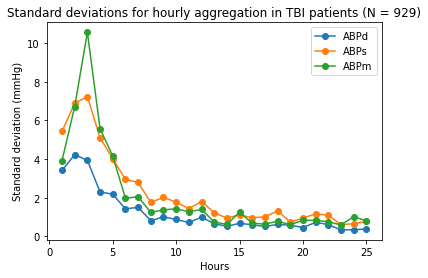

In [113]:
df_hourly = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_hour_std.csv', delimiter=',')
df_std = df_hourly.pivot_table(index = ['stay_id', 'hour_from_intime'], columns = 'feature_name', values = 'std')
df_std = df_std.reset_index(level=[ 'stay_id'])
df_std.drop(columns = 'stay_id', inplace = True)
vit = ['ABPd', 'ABPs', 'ABPm']
mean_std = pd.DataFrame()
for v in vit:
    mean_std[v] = [df_std.loc[i][v].mean() for i in range(25)]

plt.plot(range(1,26), mean_std['ABPd'], label = 'ABPd', linestyle='-', marker='o')
plt.plot(range(1,26), mean_std['ABPs'], label = 'ABPs', linestyle='-', marker='o')
plt.plot(range(1,26), mean_std['ABPm'], label = 'ABPm', linestyle='-', marker='o')
plt.ylabel('Standard deviation (mmHg)')
plt.xlabel('Hours')
plt.title('Standard deviations for hourly aggregation in TBI patients (N = 929)')
plt.legend(loc='upper right')
plt.savefig('std_analysis')
plt.show()

(1000, 13, 24)


Text(0, 0.5, 'Value (mmHg)')

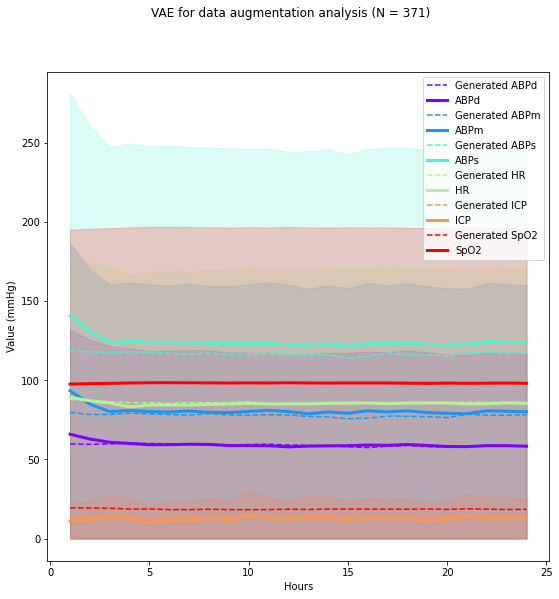

In [154]:
#VAE data augmentation
from pyrsistent import b


list_vit = ['ABPd', 'ABPm', 'ABPs', 'HR', 'ICP', 'RR', 'SpO2']
list_vit_clean = ['ABPd', 'ABPm', 'ABPs', 'HR', 'ICP', 'RR','SpO2']


nb_hours = 24

df = pd.read_csv('preprocessed_batches/df_hourly_reg.csv')
new_samples = np.load('preprocessed_batches/new_samples_vae.npy')
TBI_data = np.load('preprocessed_batches/final_data_TBI.npy')


agg_mean = (df).groupby(df.hour_from_intime).agg({'ABPm': np.mean, 'ABPs': np.mean, 'ABPd': np.mean,  'ICP':np.mean, 'SpO2':np.mean, 'HR':np.mean})
agg_std = (df).groupby(df.hour_from_intime).agg({'ABPm': np.mean, 'ABPs': np.mean, 'ABPd': np.mean, 'ICP':np.mean, 'SpO2':np.mean, 'HR':np.mean})
color = iter(cm.rainbow(np.linspace(0, 1, len(list_vit))))
color_2 = iter(cm.rainbow(np.linspace(0, 1, len(list_vit_clean_2))))
print(new_samples.shape)
new_samples = new_samples.mean(axis = 0)


fig, ax = plt.subplots(figsize=(9, 9))
fig.suptitle('VAE for data augmentation analysis (N = 371)')
for i in (range(len(list_vit))):
    c = next(color)
    
    ax.plot(range(1,nb_hours + 1),new_samples[i], label = 'Generated %s' %list_vit_clean[i], color=c, ls='--' )
    ax.plot(range(1,nb_hours + 1), agg_mean[list_vit[i]], alpha=1, color=c, label=list_vit_clean[i], linewidth = 3.0)
    ax.fill_between(range(1,nb_hours + 1), agg_mean[list_vit[i]] - agg_std[list_vit[i]], agg_mean[list_vit[i]] + agg_std[list_vit[i]], color=c  , alpha=0.2)
    plt.grid()

ax.legend(loc='best')
ax.set_xlabel("Hours")
ax.set_ylabel("Value (mmHg)")


In [11]:
print(batches_ABP)

[]
